In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("/content/sample_data/vstup_2024.xlsx")

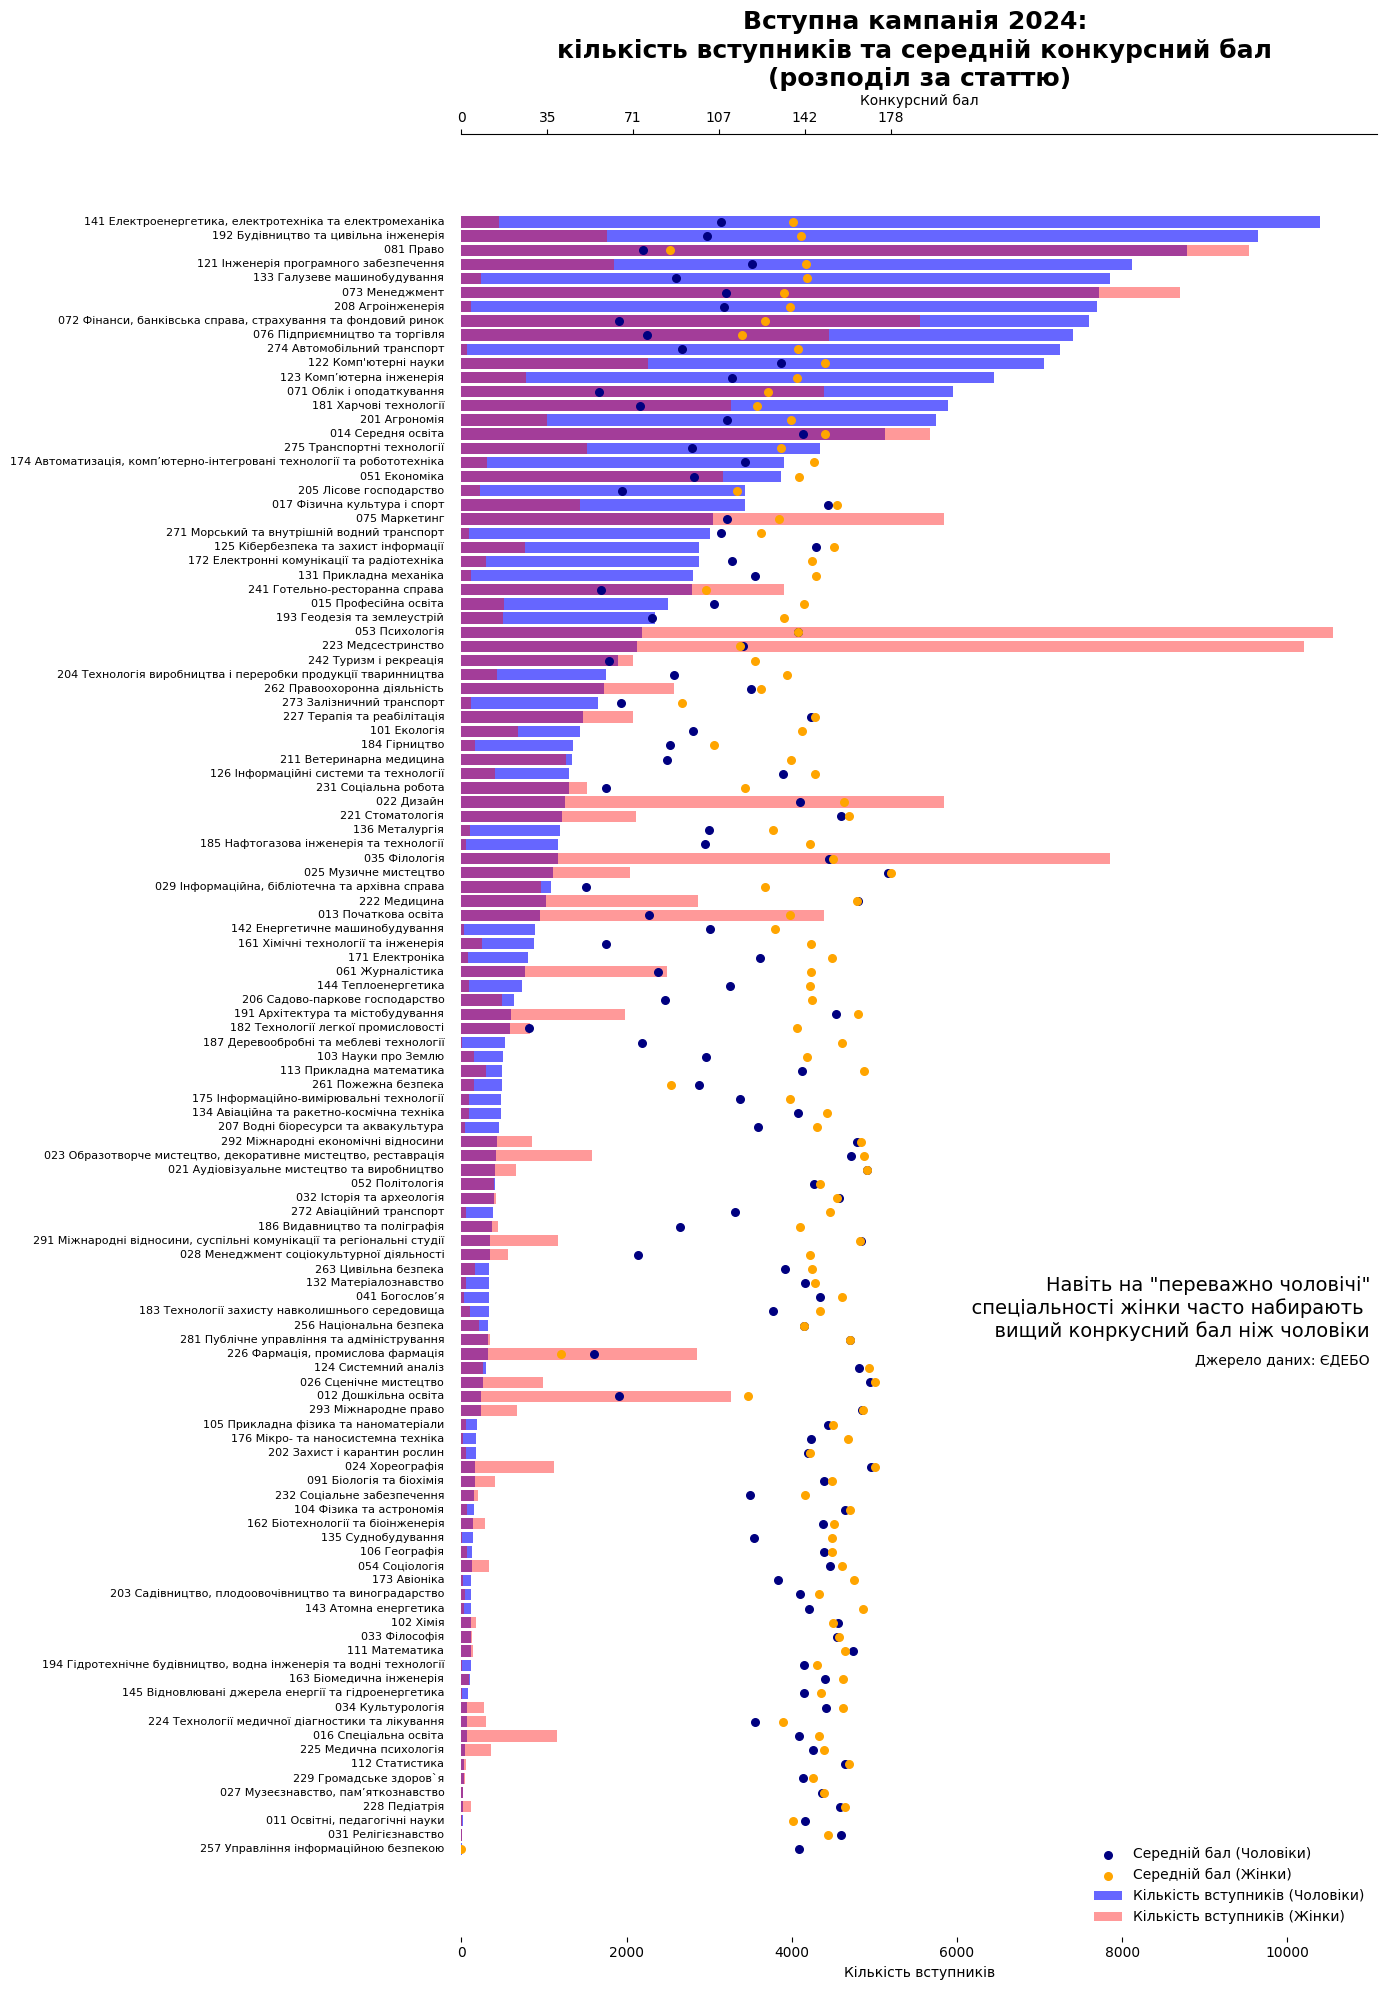

In [ ]:
counts = df.groupby(['Спеціальність', 'Стать']).size().unstack(fill_value=0)

mean_score = df.groupby(['Спеціальність', 'Стать'])['Конкурсний бал'].mean().unstack(fill_value=0)

counts['score_m'] = mean_score.get('Ч', pd.Series(dtype=float)).fillna(0)
counts['score_f'] = mean_score.get('Ж', pd.Series(dtype=float)).fillna(0)

counts = counts.sort_values('Ч', ascending=True)

max_applicants = counts['Ч'].max()
max_score = max(counts['score_m'].max(), counts['score_f'].max())
score_scale = max_applicants * 0.5 / max_score

fig, ax = plt.subplots(figsize=(14, 20))
bar_height = 0.8

ax.barh(counts.index, counts['Ч'], color='blue', alpha=0.6, label='Кількість вступників (Чоловіки)', height=bar_height)

ax.barh(counts.index, counts['Ж'], color='red', alpha=0.4, label='Кількість вступників (Жінки)', height=bar_height)

for i, (index, row) in enumerate(counts.iterrows()):
    ax.scatter(row['score_m'] * score_scale, index, color='navy', s=30, label='Середній бал (Чоловіки)' if i == 0 else "")
    ax.scatter(row['score_f'] * score_scale, index, color='orange', s=30, label='Середній бал (Жінки)' if i == 0 else "")

ax.set_xlabel('Кількість вступників')

secax = ax.secondary_xaxis('top',
    functions=(lambda x: x / score_scale, lambda x: x * score_scale))
secax.set_xlabel('Конкурсний бал')
secax.set_xticks(np.linspace(0, max_score, 6))
secax.set_xticklabels([f"{int(t)}" for t in np.linspace(0, max_score, 6)])

for i, spec in enumerate(counts.index):
    ax.text(-max_applicants * 0.02, i, spec, ha='right', va='center', fontsize=8)

text = '''Навіть на "переважно чоловічі"
          спеціальності жінки часто набирають
          вищий конркусний бал ніж чоловіки'''
ax.text(11000, 40.5, text, ha='right', va='top', fontsize=14)

text = '''Джерело даних: ЄДЕБО'''
ax.text(11000, 35, text, ha='right', va='top', fontsize=10)


ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.set_yticks([])

ax.legend(
    loc='lower right',
    bbox_to_anchor=(1, 0),
    frameon=False,
    fontsize=10
)

title = '''Вступна кампанія 2024:
кількість вступників та середній конкурсний бал
(розподіл за статтю)'''
ax.set_title(title, fontsize=18, weight='bold')

plt.tight_layout()
plt.show()